# 1 数据准备

## 1.1 导入数据

In [28]:
# 导入包

# 忽略警告提示
import warnings
warnings.filterwarnings('ignore')

#导入数据处理包
import numpy as np
import pandas as pd

#绘图包
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import matplotlib
# matplotlib.use('qt4agg')
#指定默认字体
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['font.family']='sans-serif'
#解决负号'-'显示为方块的问题
matplotlib.rcParams['axes.unicode_minus'] = False

#时间序列
from datetime import datetime

In [29]:
#导入数据
train = pd.read_csv('E:\\Kaggle课件_共享单车预测\\Data\\train.csv',engine='python')

#测试数据集
test  = pd.read_csv('E:\\Kaggle课件_共享单车预测\\Data\\test.csv',engine='python')

#了解数据集总数
print ('训练数据集:',train.shape,'测试数据集:',test.shape)

训练数据集: (10886, 12) 测试数据集: (6493, 9)


## 1.2 查看数据

In [30]:
#查看前五行
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


# 2  数据预处理 

##  2.1 特征值处理

此项目中特征值为‘count’-单车使用总量，由于该特征值分布不均匀，先去除三倍方差以外的值，再进行对数化处理。

In [31]:
#训练集去除3倍方差以外数据
train_std = train[np.abs(train['count']-
                        train['count'].mean())<=(3*train['count'].std())] 
train_std.shape

(10739, 12)

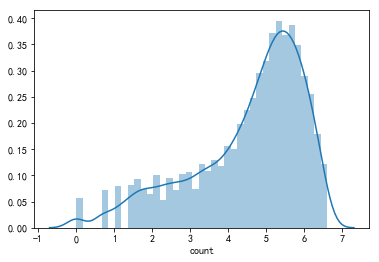

In [32]:
#对数据进行对数变换后的分布
ylabels = train_std['count']
ylabels_log = np.log(ylabels)
sns.distplot(ylabels_log)

## 2.2 数据变换

In [33]:
#将train_std、test 合并，便于修改

full = train_std.append( test , ignore_index = True )

print ('合并后的数据集:',full.shape)

合并后的数据集: (17232, 12)


In [34]:
# 记录数据的行数 0表示行，1表示列
row_train = train_std.shape[0]   
row_test = test.shape[0]
print('kaggle训练数据集有多少行数据：',row_train,
     '； kaggle测试数据集有多少行数据：',row_test)

kaggle训练数据集有多少行数据： 10739 ； kaggle测试数据集有多少行数据： 6493


##  2.3 特征工程

选择特征值

根据前面的观察，决定将 温度（temp）、湿度（humidity）、风速（windspeed）、天气等级（weather）、季节（season）、年份（年）、月份（月）、 星期（星期）、时段（小时），8项作为特征值。

In [35]:
# 列名字典
columns_dict = {
    'datetime':'日期时间'
}
# 列名重命名
full.rename(columns=columns_dict, inplace=True)
full.head()


full['日期']=full['日期时间'].apply( lambda c : c.split( )[0])
full['星期']=full['日期'].apply( lambda c : datetime.strptime(c,'%Y-%m-%d').isoweekday())
full['年']=full['日期时间'].apply( lambda c : c.split( )[0].split('-')[0]).astype('int')
full['月']=full['日期时间'].apply( lambda c : c.split( )[0].split('-')[1]).astype('int')
full['日']=full['日期时间'].apply( lambda c : c.split( )[0].split('-')[2]).astype('int')
full['小时']=full['日期时间'].apply( lambda c : c.split( )[1].split(':')[0]).astype('int')
full.head(5)


,atemp,casual,count,日期时间,holiday,humidity,registered,season,temp,weather,windspeed,workingday,日期,星期,年,月,日,小时
0,14.395,3.0,16.0,2011-01-01 00:00:00,0,81,13.0,1,9.84,1,0.0,0,2011-01-01,6,2011,1,1,0
1,13.635,8.0,40.0,2011-01-01 01:00:00,0,80,32.0,1,9.02,1,0.0,0,2011-01-01,6,2011,1,1,1
2,13.635,5.0,32.0,2011-01-01 02:00:00,0,80,27.0,1,9.02,1,0.0,0,2011-01-01,6,2011,1,1,2
3,14.395,3.0,13.0,2011-01-01 03:00:00,0,75,10.0,1,9.84,1,0.0,0,2011-01-01,6,2011,1,1,3
4,14.395,0.0,1.0,2011-01-01 04:00:00,0,75,1.0,1,9.84,1,0.0,0,2011-01-01,6,2011,1,1,4


In [36]:
full_feature = full[['temp','humidity','weather','season','年','月','星期','小时','count']]

full_feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17232 entries, 0 to 17231
Data columns (total 9 columns):
temp        17232 non-null float64
humidity    17232 non-null int64
weather     17232 non-null int64
season      17232 non-null int64
年           17232 non-null int32
月           17232 non-null int32
星期          17232 non-null int64
小时          17232 non-null int32
count       10739 non-null float64
dtypes: float64(2), int32(3), int64(4)
memory usage: 1009.8 KB


In [37]:
#由于CART决策树使用二分类，所以将多类别型数据使用one-hot转化成多个二分型类别
dummies_month = pd.get_dummies(full_feature['月'], prefix= 'month')
dummies_season = pd.get_dummies(full_feature['season'],prefix='season')
dummies_weather = pd.get_dummies(full_feature['weather'],prefix='weather')
dummies_year = pd.get_dummies(full_feature['年'],prefix='year')

#把5个新的特征和原来的表连接起来
full_feature = pd.concat([full_feature,dummies_month,dummies_season,dummies_weather,dummies_year],axis=1)

#删除原有列
dropFeatures = ['season','weather','年','月']
full_feature = full_feature.drop(dropFeatures ,axis = 1)

# 3构建模型

## 3.1 设置训练集和预测集 

In [38]:
#将 full_new 拆分为训练集和测试集
train_data = full_feature[:10739]
test_data = full_feature[10739:]

设置特征与标签

In [39]:
#原始数据集：特征
source_X = train_data.drop(['count'],axis = 1)

#原始数据集：标签
ylable = train_data['count']
source_y = np.log(ylable)

#预测数据集：特征
pred_X = test_data.drop(['count'],axis = 1)

#原始数据集有多少行
print('原始数据集有多少行:',source_X.shape[0])

#预测数据集大小
print('预测数据集有多少行:',pred_X.shape[0])

原始数据集有多少行: 10739
预测数据集有多少行: 6493


将训练集拆分为训练和测试集

In [42]:
from sklearn.model_selection import train_test_split 

#建立模型用的训练数据集和测试数据集
train_X, test_X, train_y, test_y = train_test_split(source_X ,
                                                    source_y,
                                                    train_size = 0.80)

#输出数据集大小
print ('原始数据集特征：',source_X.shape, 
       '训练数据集特征：',train_X.shape ,
      '测试数据集特征：',test_X.shape)

print ('原始数据集标签：',source_y.shape, 
       '训练数据集标签：',train_y.shape ,
      '测试数据集标签：',test_y.shape)

原始数据集特征： (10739, 26) 训练数据集特征： (8591, 26) 测试数据集特征： (2148, 26)
原始数据集标签： (10739,) 训练数据集标签： (8591,) 测试数据集标签： (2148,)


## 3.2 选择模型训练模型

In [43]:
from sklearn.ensemble import RandomForestRegressor

#选择模型
Model = RandomForestRegressor(n_estimators=1000 , random_state = 42)

#模型训练
Model.fit(train_X , train_y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

## 3.3 模型结果评价

In [44]:
# 分类问题，score得到的是模型的正确率
Model.score(test_X , test_y )

0.9396135425767684

# 4 方案实施

In [49]:
# 预测数据
pre_datetime = test['datetime']
pre_test = test
pred_value = Model.predict( pred_X )
pred_value = np.exp(pred_value)
pre_test['count'] = pred_value
pre_test['count'] = pre_test['count'].astype(int)
pre_test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,12
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,3
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2


In [53]:
submission = pd.DataFrame({'datetime':pre_datetime , 'count':pred_value},columns=['datetime','count'])
submission['count'] = submission['count'].astype(int)
submission.to_csv('bike_predictions.csv',index = False)